**Import Necessary Libraries**

In [2]:
#import necessary libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

### Data Preparation and Exploration



In [3]:
df = pd.read_csv("mushroom_classification.csv")

print("Number of rows and columns:", df.shape)

print("First few rows of the dataset:")
df.head()

Number of rows and columns: (54035, 9)
First few rows of the dataset:


,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### Exploratory Data Analysis (EDA)



In [4]:
features_to_analyze = ['cap_diameter', 'stem_height', 'stem_width']
grouped = df.groupby('class')[features_to_analyze].mean()
print("Grouped by target class:")
print(grouped)

Grouped by target class:
       cap_diameter  stem_height   stem_width
class                                        
0        633.064696     0.627374  1208.915189
1        513.236293     0.867251   921.516563


<Figure size 1200x600 with 0 Axes>

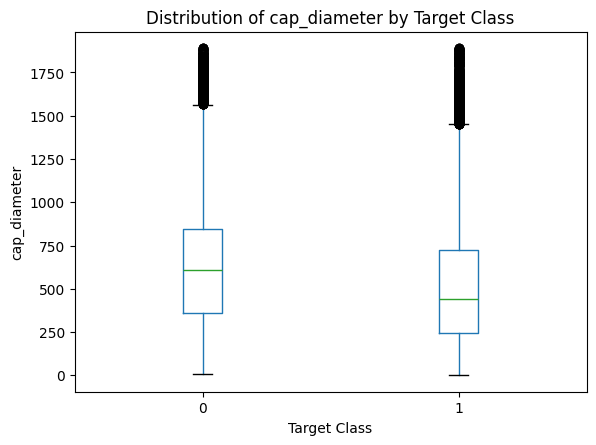

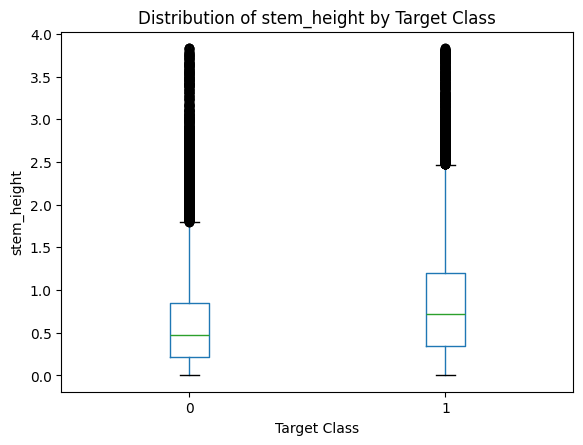

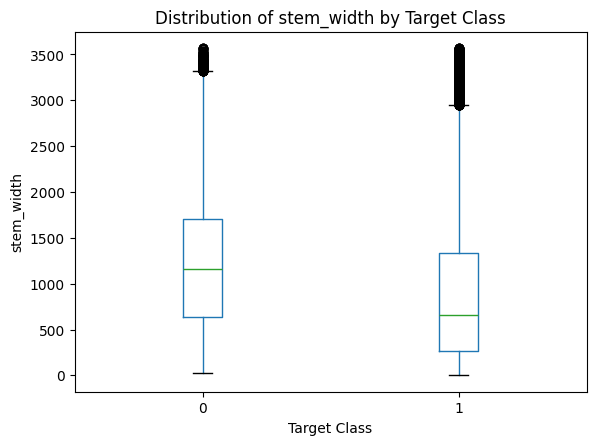

In [5]:
plt.figure(figsize=(12, 6))
for feature in features_to_analyze:
    df.boxplot(column=feature, by='class', grid=False)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()

### Model Training Using Basic Models



In [6]:
X = df[["cap_diameter", "cap_shape", "gill_attachment", "gill_color", "stem_height", "stem_width", "stem_color", "season"]]
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(report_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.57      6087
           1       0.65      0.67      0.66      7422

    accuracy                           0.62     13509
   macro avg       0.61      0.61      0.61     13509
weighted avg       0.62      0.62      0.62     13509



In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(report_dt)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6087
           1       0.98      0.98      0.98      7422

    accuracy                           0.98     13509
   macro avg       0.98      0.98      0.98     13509
weighted avg       0.98      0.98      0.98     13509



###  Model Training Using Gradient Boosting Classifier



In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)


report_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(report_gb)

In [ ]:
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Exploring Various Parameters in Gradient Boosting Classifier


In [ ]:

gb_params = {
    'learning_rate': 0.05,
    'n_estimators': 150,
    'max_depth': 4,
    'min_samples_split': 3,
    'min_samples_leaf': 2
}
gb_model_custom = GradientBoostingClassifier(**gb_params)
gb_model_custom.fit(X_train, y_train)


y_pred_gb_custom = gb_model_custom.predict(X_test)

report_gb_custom = classification_report(y_test, y_pred_gb_custom)
print("Gradient Boosting Classification Report with Custom Parameters:")
print(report_gb_custom)